<a href="https://colab.research.google.com/github/dudusnv/datascience-desafio04/blob/main/Desafio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Parte 1- ANÁLISE DESCRITIVA**

In [ ]:
#Importar Biblioteca e Data Set
import pandas as pd
import gdown
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# ID do arquivo no Google Drive
file_id = '1Hn4Jf2d3R0QWP2830Lgu7dYixoy8sQ6n'
url = f'https://drive.google.com/uc?id={file_id}'

# Baixa o arquivo CSV
gdown.download(url, 'data.csv', quiet=False)




Downloading...
From: https://drive.google.com/uc?id=1Hn4Jf2d3R0QWP2830Lgu7dYixoy8sQ6n
To: /content/data.csv
100%|██████████| 4.19k/4.19k [00:00<00:00, 803kB/s]


'data.csv'

#### 1.1) Explorando os Dados / Lendo arquivo CSV

In [ ]:
df = pd.read_csv('data.csv')


####1.2) Lendo as primeiras linhas do código

In [ ]:
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


####1.3) Informações gerais e estatísticas


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


####1.4) Verificando valores ausentes

In [ ]:
df.isnull().sum()

,0
youtube,0
facebook,0
newspaper,0
sales,0


####1.5) Verificando dados duplicados

In [ ]:
df.duplicated().sum()

0

##**Parte 02: ANÁLISE EXPLORATÓRIA**




####2.1) Distribuição de variáveis/ Histograma para cada variável


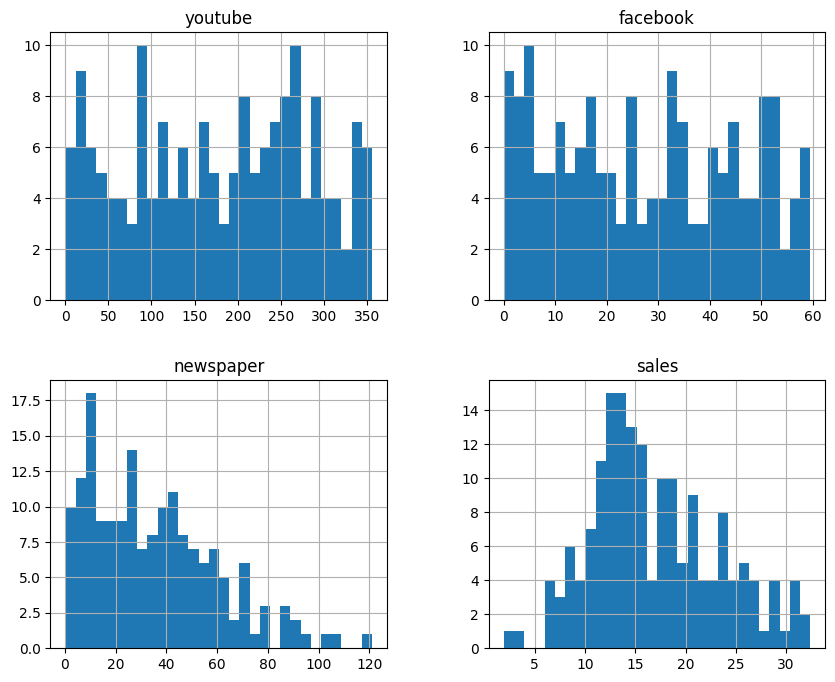

In [ ]:
df.hist(bins=30, figsize=(10, 8))
plt.show()


####2.2) Correlação entre variáveis / Matriz de correlação

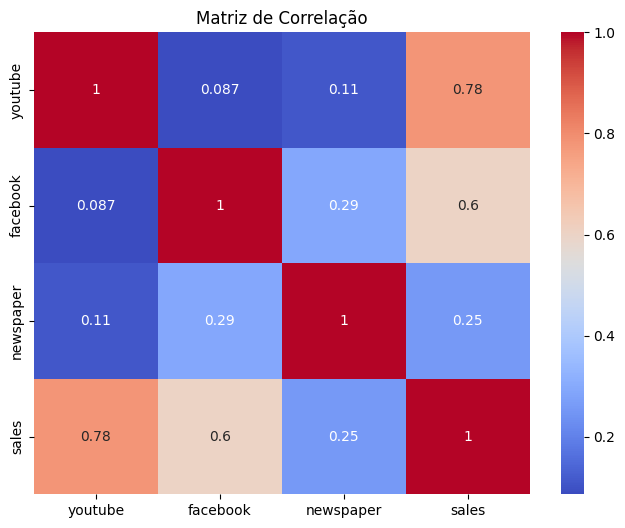

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

####2.3) Boxplot para Detecção de Outliers



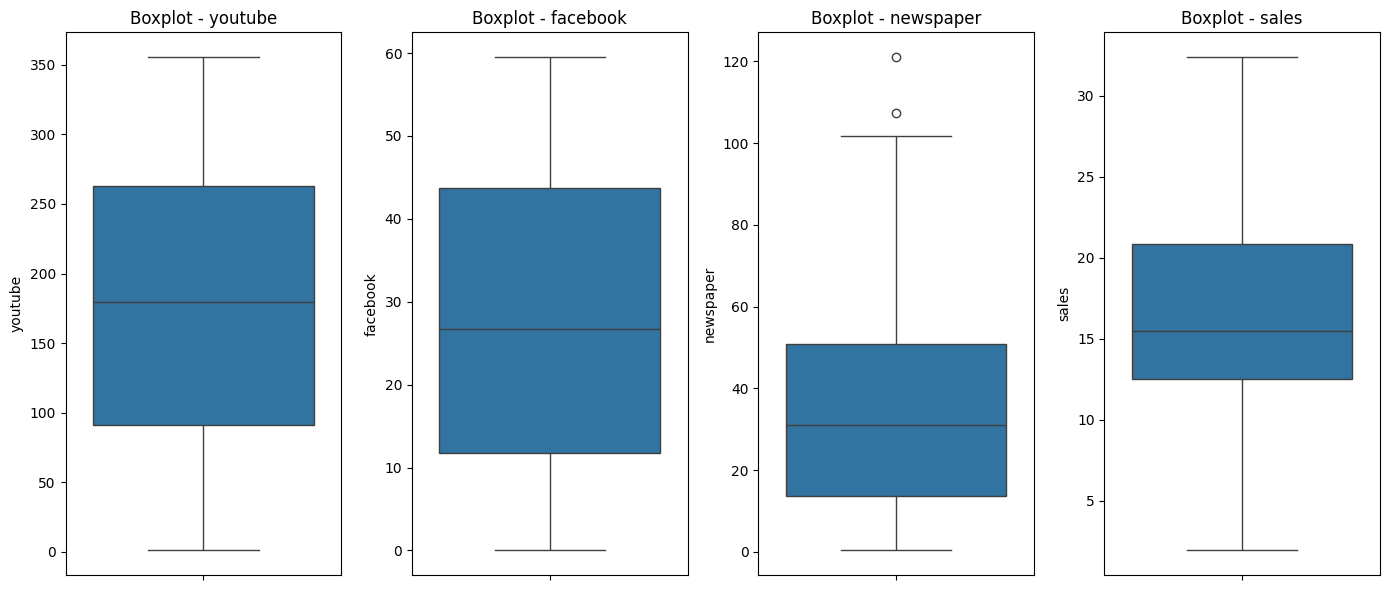

In [ ]:
plt.figure(figsize=(14, 6))
for i, coluna in enumerate(['youtube', 'facebook', 'newspaper', 'sales'], 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=df[coluna])
    plt.title(f"Boxplot - {coluna}")
plt.tight_layout()
plt.show()

##Parte 03: MODELAGEM (REGRESSÃO LINEAR)


####3.1) Definindo as variáveis de entrada (X) e de saída (y)

In [ ]:
X = df[['youtube', 'facebook', 'newspaper']]
y = df['sales']

#### 3.2) Dividindo os dados em treino e teste


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### 3.3) Criando e treinando o modelo


In [ ]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

#### 3.4) Previsões no conjunto de teste


In [ ]:
y_pred = modelo.predict(X_test)

#### 3.5) Avaliando o modelo


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 4.699445585122349
R² Score: 0.882423505618885


##Parte 04: PREDIÇÃO


####Prever o retorno de vendas para novos valores de investimento

In [ ]:
novo_investimento = pd.DataFrame({'youtube': [250], 'facebook': [40], 'newspaper': [30]})
previsao_vendas = modelo.predict(novo_investimento)

print("Previsão de Vendas para o Novo Investimento:", previsao_vendas[0])

Previsão de Vendas para o Novo Investimento: 22.48909598956018
